In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from control.matlab import *
import slycot
from scipy import signal,io
import os
from scipy.linalg import fractional_matrix_power

# Python control toolbox available at https://python-control.readthedocs.io/

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})


In [2]:
q = 2   # Number of inputs
p = 2   # Number of outputs
n = 100 # State dimension
r = 10 # Reduced model order

testSys_mat = io.loadmat(os.path.join('..','DATA','testSys_Fig9p5_ABCD.mat'))
A = testSys_mat['A']
B = testSys_mat['B']
C = testSys_mat['C']
D = testSys_mat['D']

sys = ss(A,B,C,D,1)

In [25]:
## Figure 1 = simple impulse response

tspan = np.arange(100)
y,t = impulse(sys,T=tspan)
t = np.concatenate((np.arange(-10,0,1),t))
y = np.concatenate((np.zeros((10,1)),y))
u = np.zeros_like(y)
u[10] = 1

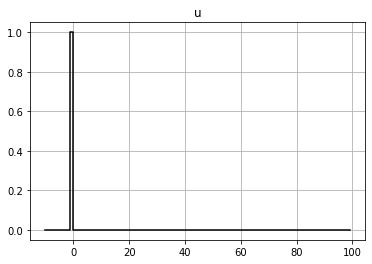

In [29]:
plt.step(t,u,'k',linewidth=1.5)
plt.grid()
plt.title('u')
plt.show()

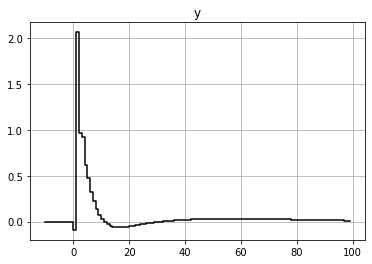

In [30]:
plt.step(t,y,'k',linewidth=1.5)
plt.grid()
plt.title('y')
plt.show()

In [33]:
## FIgure 2 - OKID response

t = np.arange(100)
u = np.zeros_like(t)
u[:50] = np.random.randn(50)
y,t,_ = lsim(sys,u,t)

t = np.concatenate((np.arange(-10,0,1),t))
y = np.concatenate((np.zeros((10,1)),y))
u = np.concatenate((np.zeros(10),u))

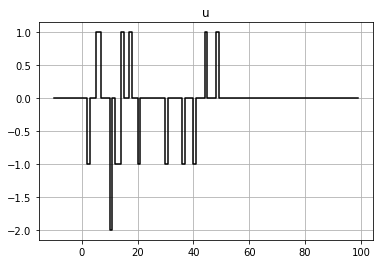

In [35]:
plt.step(t,u,'k',linewidth=1.5)
plt.grid()
plt.title('u')
plt.show()

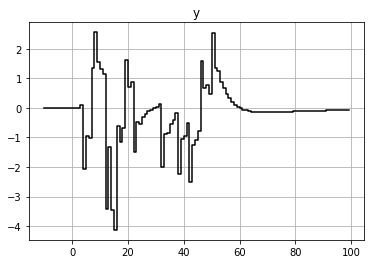

In [36]:
plt.step(t,y,'k',linewidth=1.5)
plt.grid()
plt.title('y')
plt.show()